<a href="https://colab.research.google.com/github/ValdazoAmerico/Animated-Fonts/blob/master/chatbot/CHATBOT_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.menos de 48hs de evolución
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/My Drive/"

In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
df = pd.read_csv (path + 'dataset_chat_soporte_v4.csv',index_col=0)
df.info()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3397 entries, 0 to 3396
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          3397 non-null   object
 1   discriminado  3397 non-null   object
dtypes: object(2)
memory usage: 79.6+ KB


In [ ]:
df['text'] = df['text'].str.lower()

In [ ]:
df = df.groupby('discriminado', group_keys=False).apply(lambda x: x.sample(min(len(x), 500)))

In [ ]:
df = df[['text', 'discriminado']]

In [ ]:
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [ ]:
df["text"] = df['text'].apply(remove_punctuations)

In [ ]:
df['text'] = df['text'].str.translate(str.maketrans("áéíóú", "aeiou"))

In [ ]:
df['text'] = df['text'].str.replace('\n', '')

In [ ]:
df['text'] = df['text'].str.replace('ã', '')

In [ ]:
df['text'] = df['text'].str.replace('¡', '')

In [ ]:
df['text'] = df['text'].str.replace('³', '')

In [ ]:
df['text'] = df['text'].str.replace('´', '')

In [ ]:
df['text'] = df['text'].str.replace('±', '')

In [ ]:
df['text'] = df['text'].str.replace('©', '')

In [ ]:
df['text'] = df['text'].str.rstrip("\n")

In [ ]:
df['text'] = (df['text'].str.split()).str.join(' ')

In [ ]:
len(df)

3397

In [ ]:
df.tail(15)

,text,discriminado
983,nesecito solicitar recetas de medicamentos soy de la obra social de union personal complicado y tedioso hacerlo por este medio,recetas
563,necesito pedir recetas para medicacion hipertension no me atienden y desde union personal no me dan solucion,recetas
3018,la app es una mierda y el medico no llama,connection_problem
1163,hola buen dia estoy esperando un resultado de hisopado por covid19 dentro de las 48hs ya cumplidas a nombre de candela belen sosa dni 43202332 domicilio triunvirato 3420 villa luzuriaga la matanza quisiera dejarte mi celular porque el numero que a ella la llamaron se le rompio y no van a tener forma de comunicarse mi numero es 1134557937 o comunicarse por este mail desde ya muchas gracias y espero una pronta respuesta,datos_personales
787,no llego el medico dijeron que mandaban un pediatra,turno
1122,por favor no tengo wifi estoy conectada con datos movil y ya se me va a terminar,connection_problem
892,soy covid positivo debo comunicarme con la art,covid
3203,hola buen dia necesito pedir una ambulancia y la pagina no me deja registrar desde el ling,estado
2356,pedi receta el 9 de abril y aun no e tenido respuesta,recetas
3234,voy a esperar al medico w esta demorado,espera


In [ ]:
df.discriminado.value_counts()

covid                 534
connection_problem    508
espera                508
recetas               505
turno                 448
certificados          321
sintomas              307
estado                141
datos_personales      125
Name: discriminado, dtype: int64

In [ ]:
def createRow(text, discriminado):
  global df
  row = {'text': text, 'discriminado': discriminado}
  df = df.append(row, ignore_index=True)
  return df

In [ ]:
df = df.drop([3394, 3395])

In [ ]:
createRow('estoy esperando hace una consulta medica', 'espera')

,text,discriminado
0,atiende alguien en esta pagina o es una burla para el q necesita de verdad,turno
1,ya pasaron las 72 hs y no me hicieron el hisopado,covid
2,nadie me llama tengo a mi nene con 39 de fiebre,sintomas
3,me enpeso con fiebre y esta como resfriada,sintomas
4,buen dia como estas queria saber que puede tomar mi hijo tiene angina viral y le quedo una tos no tuvo ni fiebre ni decaimiento,sintomas
...,...,...
3392,mi obra social me mando con ustedes omo hago para hablar con un medico,turno
3393,necesito alta de aislamiento,turno
3394,estoy esperando hace horas una consulta medica,espera
3395,estoy esperando hace tiempo una consulta medica,espera


In [ ]:
##Shuffle
df = df.sample(frac = 1)

In [ ]:
df.to_csv(path + 'dataset_chat_soporte_v2.csv')

In [ ]:
y = df.discriminado.to_list()
X = df.text.to_list()

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)

y_encoder = le.transform(y)
#len(y_encoder)
#len(le.classes_)
y = le.transform(y)


In [ ]:
import pickle

In [ ]:
with open(path + 'Chatbot_v2/chatbot_distilbert_label_encoder_V2.pickle', 'wb') as handle:
    pickle.dump(le, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
!pip freeze | grep scikit-learn

scikit-learn==0.22.2.post1


In [ ]:
len(le.classes_)

9

In [ ]:
le.classes_

array(['certificados', 'connection_problem', 'covid', 'datos_personales',
       'espera', 'estado', 'recetas', 'sintomas', 'turno'], dtype='<U18')

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [ ]:
!pip install transformers==3.1.0

In [ ]:
from transformers import DistilBertTokenizerFast
from transformers import TFDistilBertForSequenceClassification

import tensorflow as tf
import json

In [ ]:
training_sentences = X_train
validation_sentences = X_test
training_labels =   y_train
validation_labels = y_test

NameError: ignored

In [ ]:
print(len(training_sentences))
print(len(validation_sentences))

2717
680


In [ ]:
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-multilingual-cased')

In [ ]:
#NO
tokenizer.save_pretrained(path + 'Chatbot_v2/Tokenizer')

('/content/drive/My Drive/Chatbot_v2/Tokenizer/vocab.txt',
 '/content/drive/My Drive/Chatbot_v2/Tokenizer/special_tokens_map.json',
 '/content/drive/My Drive/Chatbot_v2/Tokenizer/added_tokens.json')

In [ ]:
#NO
from transformers import AutoTokenizer
tokenizer2 = AutoTokenizer.from_pretrained(path + 'Chatbot_v2')

OSError: ignored

In [ ]:
train_encodings = tokenizer(training_sentences,
                            truncation=True,
                            padding=True)
val_encodings = tokenizer(validation_sentences,
                            truncation=True,
                            padding=True)

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    training_labels
))

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    validation_labels
))

In [ ]:
# We classify two labels in this example. In case of multiclass classification, adjust num_labels value
model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-multilingual-cased',
                                                              num_labels=9)

Some weights of the model checkpoint at distilbert-base-multilingual-cased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_projector', 'vocab_transform', 'vocab_layer_norm', 'activation_13']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-multilingual-cased and are newly initialized: ['dropout_19', 'pre_classifier', 'classifier']
You should probably TRAIN this model on a down-stream ta

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
model.compile(optimizer=optimizer, loss=model.compute_loss, metrics=['accuracy'])
model.fit(train_dataset.shuffle(100).batch(16),
          epochs=2,
          batch_size=8,
          validation_data=val_dataset.shuffle(100).batch(16))

Epoch 1/2
170/170 [==============================] - 130s 714ms/step - loss: 1.3069 - accuracy: 0.6137 - val_loss: 0.3674 - val_accuracy: 0.9088
Epoch 2/2
170/170 [==============================] - 125s 737ms/step - loss: 0.2450 - accuracy: 0.9326 - val_loss: 0.2971 - val_accuracy: 0.9118


In [ ]:
model.save_pretrained(path + "Chatbot_v2/model_files")

In [ ]:
pip install tensorflow==2.1

     |████████████████████████████████| 421.8MB 39kB/s 
     |████████████████████████████████| 450kB 51.0MB/s 
     |████████████████████████████████| 3.9MB 52.7MB/s 
     |████████████████████████████████| 51kB 8.1MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=f8cecf0e963d8f29b2180bd3a694b0f474ee1a7cb51d3ef888321d8465b3e095
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninsta

In [ ]:
distil_save_path = path + 'distil/1/'
tf.saved_model.save(model, distil_save_path)

INFO:tensorflow:Assets written to: /content/drive/My Drive/distil/1/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/distil/1/assets


In [ ]:
#### Load saved model and run predict function

In [ ]:
import tensorflow as tf

In [ ]:
#!pip install tf-nightly

     |████████████████████████████████| 395.9MB 37kB/s 
     |████████████████████████████████| 10.6MB 35.5MB/s 
     |████████████████████████████████| 471kB 40.4MB/s 
     |████████████████████████████████| 14.5MB 333kB/s 
     |████████████████████████████████| 1.3MB 44.6MB/s 
     |████████████████████████████████| 3.8MB 25.1MB/s 
ERROR: tensorflow 2.3.0 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: grpcio 1.33.2
    Uninstalling grpcio-1.33.2:
      Successfully uninstalled grpcio-1.33.2
  Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
  Found existing installation: protobuf 3.12.4
    Uninstalling protobuf-3.12.4

In [ ]:
loaded_model = TFDistilBertForSequenceClassification.from_pretrained(path + "chat_bot_soporte_destil_v2")

Some weights of the model checkpoint at /content/drive/My Drive/chat_bot_soporte_destil_v2 were not used when initializing TFDistilBertForSequenceClassification: ['dropout_59']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at /content/drive/My Drive/chat_bot_soporte_destil_v2 and are newly initialized: ['dropout_19']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
dic_options = {'sintomas': ["Realice un autodiagnóstico de sus síntomas"],
'turno': ['Solicite atención con un médico de guardia', 'Solicite un turno programado con especialistas'],
'espera': ['Averigue cuantos pacientes tiene por delante y estime cuando será atendido', 'Realice un autodiagnóstico de sus síntomas'],
'connection_problem': ['Soluciones a los problemas de conexión mas frecuentes'],
'estado': ['Consulte el estado de su pedido de ambulancia, hisopado o médico a domicilio'],
'recetas': ['Solicitar una receta médica', 'Reportar un error en la confección de una receta'],
'certificados': ['Solicitar un certificado médico', 'Reportar un error en la confección de un certificado'],
'covid': ['Evalue si tiene síntomas de COVID-19', 'Consulte el estado de su hisopado', 'Recomendaciones para contactos estrechos', 'Realice el seguimiento diario con UMACARE'],
'datos_personales': ['Modificar datos personales', 'Solicitar una atención para otro']}


In [ ]:
test_sentence = 'quiero saber cuantos pacientes hay delante mio'
# replace to test_sentence_sarcasm variable, if you want to test sarcasm
predict_input = tokenizer.encode(test_sentence,
                                 truncation=True,
                                 padding=True,
                                 return_tensors="tf")

tf_output = model.predict(predict_input)[0]
tf_prediction = tf.nn.softmax(tf_output, axis=1).numpy()[0]

import numpy as np
le.inverse_transform([np.argmax(tf_prediction)])
dic_proba = dict (zip (le.classes_, tf_prediction))
dic_proba_filter = {}
for k, v in dic_proba.items():
  if v > 0.05:
    dic_proba_filter [k] = v

df_filter = pd.DataFrame.from_dict(dic_proba_filter, orient='index', columns=['probabilidades']).sort_values (by = 'probabilidades', ascending = False)
lista_filter = df_filter.index.to_list()
final = []
lista_options = []
for x in lista_filter:
  for y in dic_options[x]:
    if y not in final:
      final.append (y)

df_filter.index, df_filter.values, final
  

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7fee4a6fa950>. Note that functions defined in certain environments, like the interactive Python shell do not expose their source code. If that is the case, you should to define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x7fee4a6fa950>. No

(Index(['espera', 'turno'], dtype='object'), array([[0.87049133],
        [0.10260788]]), ['Averigue cuantos pacientes tiene por delante y estime cuando será atendido',
  'Realice un autodiagnóstico de sus síntomas',
  'Solicite atención con un médico de guardia',
  'Solicite un turno programado con especialistas'])

In [ ]:
np.argmax(tf_prediction)

4

In [ ]:
dic_proba_filter

{'espera': 0.8704913, 'turno': 0.10260788}

In [ ]:
df_filter

,probabilidades
espera,0.870491
turno,0.102608


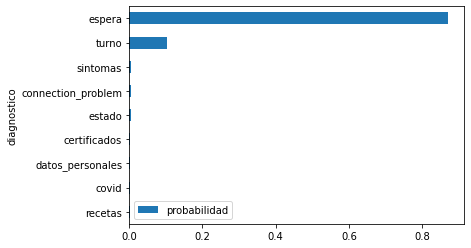

In [ ]:
array_invertido = np.argsort(tf_prediction)
diagnosticos = le.inverse_transform(array_invertido)
probabilidad = np.sort (tf_prediction)
list_of_tuples = list(zip(diagnosticos, probabilidad))[:10]
df = pd.DataFrame(list_of_tuples, columns = ['diagnostico', 'probabilidad']) 
df.head(10).plot.barh(x='diagnostico')

In [ ]:
def prediction (sentence):
  predict_input = tokenizer.encode(sentence,
                                  truncation=True,
                                  padding=True,
                                  return_tensors="tf")

  tf_output = model.predict(predict_input)[0]
  tf_prediction = tf.nn.softmax(tf_output, axis=1).numpy()[0]
  clase = np.argmax(tf_prediction)
  return clase

In [ ]:
y_pred = []
for x in X_test:
  y_pred.append (prediction (x))


In [ ]:
len (y_pred)

680

In [ ]:
len (y_test)

680

In [ ]:
y_true = y_test
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)

In [ ]:
cm

array([[ 79,   0,   1,   0,   0,   0,   0,   0,   0],
       [  0, 105,   0,   1,   1,   0,   2,   0,   2],
       [  0,   0,  82,   5,   0,   0,   1,   1,   1],
       [  0,   1,   2,  11,   0,   0,   3,   0,   1],
       [  1,   3,   2,   0,  92,   0,   3,   0,   3],
       [  0,   0,   1,   1,   0,  24,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,  94,   0,   1],
       [  0,   1,   1,   0,   0,   0,   2,  42,   0],
       [  0,   1,   1,   0,   0,   0,   0,   0,  86]])

In [ ]:
cm

array([[ 75,   1,   0,   0,   0,   0,   0,   0,   2],
       [  0, 156,   0,   0,   1,   0,   0,   0,   1],
       [  1,   0, 117,   3,   1,   0,   0,   3,   0],
       [  1,   1,   4,  13,   0,   0,   2,   0,   0],
       [  0,   1,   1,   0, 197,   0,   1,   1,   2],
       [  0,   1,   0,   0,   1,  32,   0,   0,   1],
       [  2,   0,   1,   0,   0,   0, 125,   0,   0],
       [  0,   1,   0,   0,   0,   2,   0,  46,   0],
       [  0,   0,   1,   0,   2,   0,   0,   0,  80]])

In [ ]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

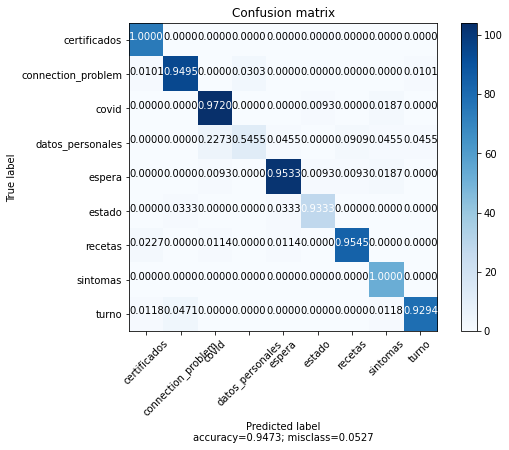

In [ ]:
plot_confusion_matrix (cm, le.classes_)

In [ ]:
test_sentence = "covid"
# replace to test_sentence_sarcasm variable, if you want to test sarcasm
predict_input = tokenizer.encode(test_sentence,
                                 truncation=True,
                                 padding=True,
                                 return_tensors="tf")

tf_output = model.predict(predict_input)[0]
tf_prediction = tf.nn.softmax(tf_output, axis=1).numpy()[0]

import numpy as np
result = le.inverse_transform([np.argmax(tf_prediction)])
print("Categoria:", result[0])

NameError: ignored

In [ ]:
test_sentence = "tengo dolor de pecho"

# replace to test_sentence_sarcasm variable, if you want to test sarcasm
predict_input = tokenizer.encode(test_sentence,
                                 truncation=True,
                                 padding=True,
                                 return_tensors="tf")

tf_output = model.predict(predict_input)[0]
tf_prediction = tf.nn.softmax(tf_output, axis=1).numpy()[0]

import numpy as np
result = le.inverse_transform([np.argmax(tf_prediction)])
print("Categoria:", result[0])

Categoria: sintomas


In [ ]:
test_sentence = "necesito re hacer la receta porque en la consulta me la hicieron mal"

# replace to test_sentence_sarcasm variable, if you want to test sarcasm
predict_input = tokenizer.encode(test_sentence,
                                 truncation=True,
                                 padding=True,
                                 return_tensors="tf")

tf_output = model.predict(predict_input)[0]
tf_prediction = tf.nn.softmax(tf_output, axis=1).numpy()[0]

import numpy as np
result = le.inverse_transform([np.argmax(tf_prediction)])
print("Categoria:", result[0])

Categoria: recetas


In [ ]:
test_sentence = "Por favor!! No me puedo comunicar????"

# replace to test_sentence_sarcasm variable, if you want to test sarcasm
predict_input = tokenizer.encode(test_sentence,
                                 truncation=True,
                                 padding=True,
                                 return_tensors="tf")

tf_output = model.predict(predict_input)[0]
tf_prediction = tf.nn.softmax(tf_output, axis=1).numpy()[0]

import numpy as np
result = le.inverse_transform([np.argmax(tf_prediction)])
print("Categoria:", result[0])

Categoria: connection_problem


In [ ]:
test_sentence = "estaria necesitando un certificado medico para presentar en el trabajo sino me descuentan el dia muchas gracias"

# replace to test_sentence_sarcasm variable, if you want to test sarcasm
predict_input = tokenizer.encode(test_sentence,
                                 truncation=True,
                                 padding=True,
                                 return_tensors="tf")

tf_output = model.predict(predict_input)[0]
tf_prediction = tf.nn.softmax(tf_output, axis=1).numpy()[0]

import numpy as np
result = le.inverse_transform([np.argmax(tf_prediction)])
print("Categoria:", result[0])

Categoria: certificados


In [ ]:
test_sentence = """Hola, mi madre se registró hace un tiempo con su número de celular pero con los datos de mi papá. 
Me podrían indicar el procedimiento para modificar los datos de la persona que está registrada con un nro de celular? 
Ella es una persona mayor y está aislada, por lo que no podemos asistirla directamente con este tema. Desde ya, muchas gracias. Atte. Victoria Arinci"""

# replace to test_sentence_sarcasm variable, if you want to test sarcasm
predict_input = tokenizer.encode(test_sentence,
                                 truncation=True,
                                 padding=True,
                                 return_tensors="tf")

tf_output = model.predict(predict_input)[0]
tf_prediction = tf.nn.softmax(tf_output, axis=1).numpy()[0]

import numpy as np
result = le.inverse_transform([np.argmax(tf_prediction)])
print("Categoria:", result[0])

Categoria: datos_personales


## LOADING MODEL

In [ ]:
import os

base_path = "/content/drive/MyDrive/Chatbot_v2"
tokenizer_path = os.path.join(base_path, "Tokenizer")
model_path = os.path.join(base_path, "model_files")
le_path = os.path.join(base_path, "chatbot_distilbert_label_encoder_V2.pickle")

In [ ]:
from transformers import AutoTokenizer
tokenizer2 = AutoTokenizer.from_pretrained(tokenizer_path)

In [ ]:
loaded_model = TFDistilBertForSequenceClassification.from_pretrained(model_path)

All model checkpoint weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the model checkpoint at /content/drive/MyDrive/Chatbot_v2/model_files.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In [ ]:
import pickle
with open(le_path, 'rb') as fp:
    le = pickle.load(fp)

In [ ]:
test_sentence = "tengo dolor de pecho y molestias abdominales"

# replace to test_sentence_sarcasm variable, if you want to test sarcasm
predict_input = tokenizer2.encode(test_sentence,
                                 truncation=True,
                                 padding=True,
                                 return_tensors="tf")

tf_output = loaded_model.predict(predict_input)[0]
tf_prediction = tf.nn.softmax(tf_output, axis=1).numpy()[0]

import numpy as np
result = le.inverse_transform([np.argmax(tf_prediction)])
print("Categoria:", result[0])

NameError: ignored